In [1]:
kpoison=0

In [2]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
import os
import joblib
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from functools import reduce

from datetime import datetime
from datetime import datetime, timedelta
from time import time

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from datetime import datetime
from datetime import datetime, timedelta
from time import time
from timeit import default_timer as timer
#start = timer()
#end = timer()
#print(end - start) 

import random

In [3]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
import os
import joblib
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score,accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from functools import reduce

from datetime import datetime
from datetime import datetime, timedelta
from time import time

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

from datetime import datetime
from datetime import datetime, timedelta
from time import time
from timeit import default_timer as timer
#start = timer()
#end = timer()
#print(end - start) 

import random

In [4]:
def under_sampling(original_features, original_labels):

    X = original_features
    y = original_labels
    undersample = RandomUnderSampler(sampling_strategy=0.8)
    X_under, y_under = undersample.fit_resample(X, y)
    malware_undersampled = X_under
    malware_undersampled['Label']=y_under
    print(f"Count after undersampling: \n{malware_undersampled['Label'].value_counts()}")
    print(f"Shape of dataset: \n{malware_undersampled.shape}")
    
    undersampled_features = malware_undersampled.drop(columns = ["Label"])
    undersampled_labels = malware_undersampled.Label

    return undersampled_features, undersampled_labels

In [5]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
  #  classes = unique_labels(y_true, y_pred)
    print('Confusion matrix')
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# RAW DATASET (NOT NECESSARY)

malware = pd.read_csv('train_set.csv') # Read dataset
malware.head()

# malware.shape
print(f"Shape of original dataset: \n{malware.shape}")

# LABELSDsitributed data (0=benign and 1=malign)
print(f"Count original dataset: \n{malware['Label'].value_counts()}")

# Show all blank spaces in dataset (if any)
malware.isnull().sum() 

# --------------
filename = 'level12_nofusion_8malwares.csv'
f = [i.strip('\n').split(",") for i in open(filename)]
print("The column is:")
print(f[0].index("Label"))

In [6]:
malware = pd.read_csv('exfil_monogram.csv')

In [7]:
malware.head()
malware.shape
malware['Label'].value_counts()
malware.isnull().sum() 

epoll_pwait    0
futex          0
getuid         0
ioctl          0
read           0
              ..
getgid32       0
getgroups32    0
ptrace         0
setsid         0
Label          0
Length: 121, dtype: int64

In [8]:
features = malware.drop('Label', axis=1) #Define Features (everything in the dataset but the "Label of Interes")
labels = malware['Label'] #Store only the "Label of Interes"

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42) #20% of data for testing, remaining 80% for training

#UNFREEZE LATER
x_train = train_set.drop(columns = ['Label'])
y_train = train_set.Label
x_test = test_set.drop(columns = ['Label'])
y_test = test_set.Label

In [9]:
print(f"The ORIGINAL label vector is the following: \n{y_train}")
#y_train 
print(f"Shape of LABEL VECTOR: \n{y_train.shape[0]}")

The ORIGINAL label vector is the following: 
443     0
2767    0
5352    1
2609    0
3103    0
       ..
3772    1
5191    1
5226    1
5390    1
860     0
Name: Label, Length: 4912, dtype: int64
Shape of LABEL VECTOR: 
4912


In [10]:
poison=kpoison #proportion of samples to be poisoned
y_train=poison_lf(y_train,poison)
print(f"The POISONED label vector is the following: \n{y_train}")

NameError: name 'poison_lf' is not defined

In [11]:
dt=DecisionTreeClassifier(random_state=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

Confusion matrix
[[658   7]
 [  6 558]]


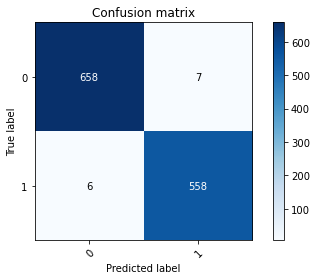

The accuracy is: 0.9894222945484134
The precision is: 0.9876106194690265
The recall is: 0.9893617021276596
The f1 score is: 0.9884853852967228
The auc score is: 0.989417693169093


In [12]:
y_predicted = dt.predict(x_test).astype(int)
plot_confusion_matrix(y_test, y_predicted, classes=unique_labels(y_test.astype(int), y_predicted), title='Confusion matrix')
plt.show()
print(f"The accuracy is: {accuracy_score(y_test, y_predicted)}")
print(f"The precision is: {precision_score(y_test, y_predicted)}")
print(f"The recall is: {recall_score(y_test, y_predicted)}")
print(f"The f1 score is: {f1_score(y_test, y_predicted)}")
print(f"The auc score is: {roc_auc_score(y_test, y_predicted)}")
y_predicted = pd.DataFrame(y_predicted)
test_set_prediction = x_test
test_set_prediction['Predicted Label'] = y_predicted
test_set_prediction.to_csv('test_set_prediction.csv',index=False)